## Data Visualization on Earnings based on College Major

In this project, we'll be working with a dataset on the job outcomes of students who graduated college between 2010 and 2012. The original dataset on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github](https://github.com/fivethirtyeight/data/tree/master/college-majors) repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns we'll be working with the most in the dataset:

* `Rank` - Rank by **median** earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers. 
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

In the link provided to the right, [FiveThirtyEight](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/) already wrote an article detailing their findings in the data. While very insightful, we can forsee challenges for non-technical people reading the article because it's more difficult to absorb information when numbers and statistics are involved. The old adage that "*a picture is worth a thousand words*" still holds true when synthesizing information which is why we've decided to add value to this well-done article by using **data visualizations** to add a deeper, more intuitive layer to this data story. Not only will we be adding visualizations but also doing more to add insight to the information presented from this dataset. Using visualizations, we can start to explore the following **business questions** like:

* Using scatterplots, do students in more popular majors make more money?

* Using histograms, how many majors are predominantly male? Predominantly female?

* Using bar plots, which category of majors have the most students?

We'll explore how to do these and more while primarily working in pandas. In our analysis, we'll try to follow the steps typical in a life cycle of a Data Science project. The link I've provided [here](https://www.edureka.co/blog/data-science-projects/) provides a general overview of the typical stages within a Data Science project. We've already adressed the first step in our previous paragraph which was **Defining the problem statement**, now we'll move on to the second step which is **Data Collection**. Before we start creating a data visualizations for our **Data Exploration** step, let's import the libraries we need and remove rows containing null values.

**Data Collection**

In our code box above, we've identified another way of uploading datasets directly from a URL link on Github. From there, we displayed the first two rows of our new `recent_grads` dataframe and then used the `df.describe()` function to run descriptive statistics in each of our columns. 

In [1]:
#Importing data straight from a Github repository URL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'
recent_grads = pd.read_csv(url, index_col=0, error_bad_lines=False)


#Initial Exploration of the dataset
print(recent_grads.head(1), '\n', '\n')
print(recent_grads.iloc[2], '\n', '\n')
print(recent_grads.describe(), '\n', '\n')

      Major_code                  Major   Total     Men  Women Major_category  \
Rank                                                                            
1           2419  PETROLEUM ENGINEERING  2339.0  2057.0  282.0    Engineering   

      ShareWomen  Sample_size  Employed  Full_time  Part_time  \
Rank                                                            
1       0.120564           36      1976       1849        270   

      Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th  \
Rank                                                                       
1                     1207          37           0.018381  110000  95000   

       P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
Rank                                                         
1     125000          1534               364            193   
 

Major_code                                   2415
Major                   METALLURGICAL ENGINEERING
Total                                    

**Data Cleaning**

Next, we ran some tests to identify any null values in our columns by chaining the `isnull()` with the `sum()` functions. In doing so, we found that the `Total`, `Men`, `Women`, and `ShareWomen` were all missing one value each so we located the rows with missing values and sure enough we identified that a single row, `Food Science`, was responsible for all these missing values. We went ahead and dropped this row from our analysis using the `dropna()` function since there were too many missing values in it for us to salvage. 

In [2]:
#Exploring and removing null values
raw_data_count = recent_grads.shape
print(raw_data_count, '\n')

#Identifying rows with missing values
missing = recent_grads.isnull().sum()
print(missing, '\n')

rows_missing_values = recent_grads.loc[recent_grads.isnull().any(axis=1)]
print(rows_missing_values)

(173, 20) 

Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64 

      Major_code         Major  Total  Men  Women  \
Rank                                                
22          1104  FOOD SCIENCE    NaN  NaN    NaN   

                       Major_category  ShareWomen  Sample_size  Employed  \
Rank                                                                       
22    Agriculture & Natural Resources         NaN           36      3149   

      Full_time  Part_time  Full_time_year_round  Unemployed  \


In [3]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape

print(cleaned_data_count)

(172, 20)


**Data Exploration / Analysis**

We've now reached our main goal of this analysis which is to practice our data visualization skills by exploring key trends within our `recent_grads` dataset. With the code below, we'll generate scatterplots to identify any relationships between our variables. 

Text(0, 0.5, 'Median Salary')

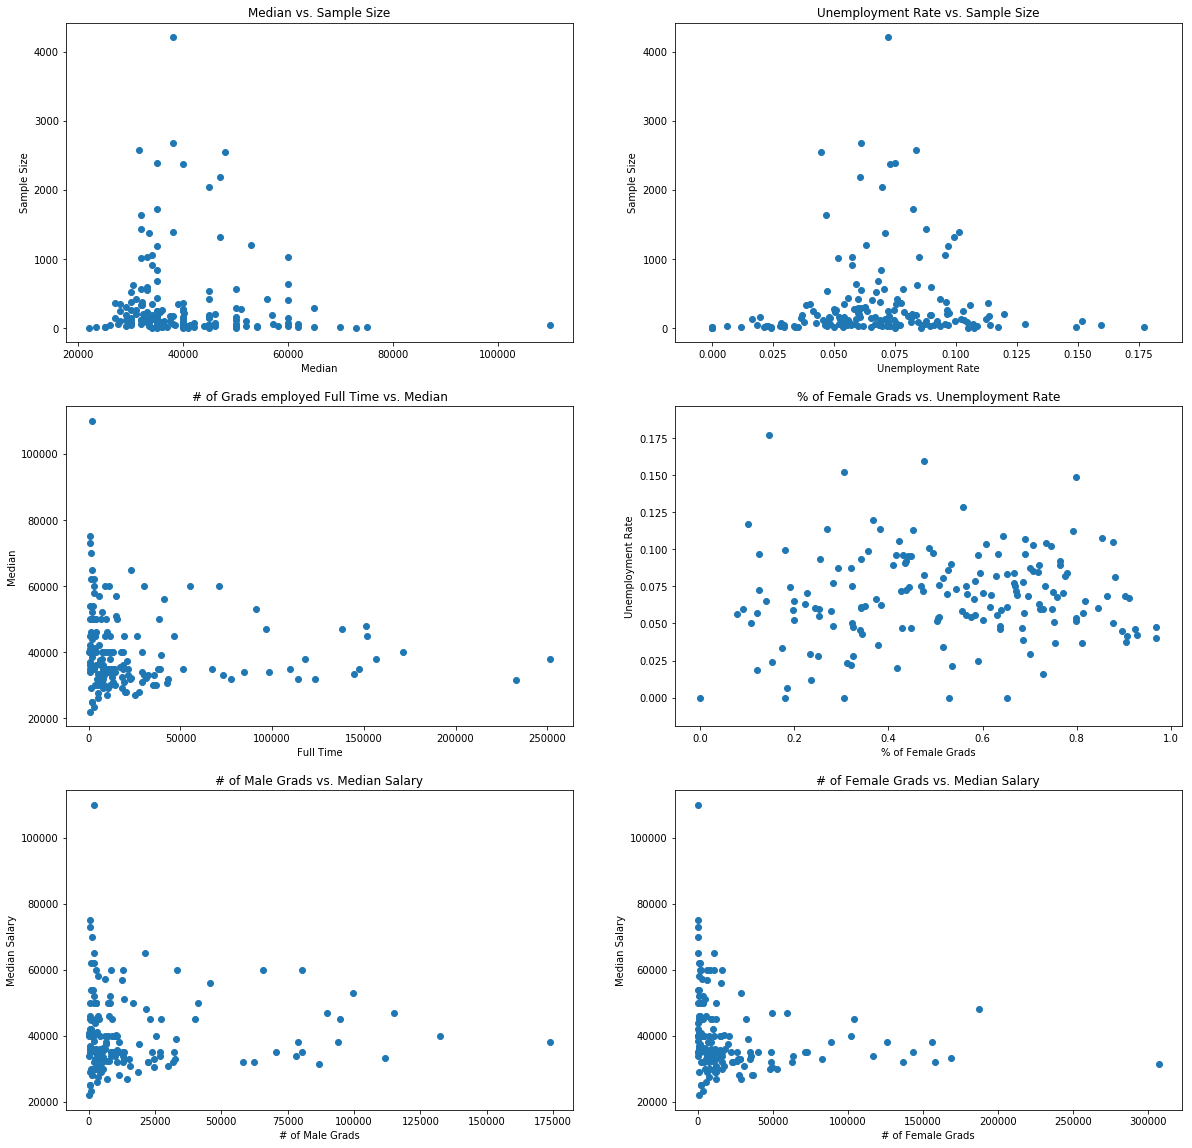

In [4]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(3,2,1)
ax1.scatter(x=recent_grads['Median'], y=recent_grads['Sample_size'])
ax1.set_title('Median vs. Sample Size')
ax1.set_xlabel('Median')
ax1.set_ylabel('Sample Size')

ax2 = fig.add_subplot(3,2,2)
ax2.scatter(x=recent_grads['Unemployment_rate'], y=recent_grads['Sample_size'])
ax2.set_title('Unemployment Rate vs. Sample Size')
ax2.set_xlabel('Unemployment Rate')
ax2.set_ylabel('Sample Size')

ax3 = fig.add_subplot(3,2,3)
ax3.scatter(x=recent_grads['Full_time'], y=recent_grads['Median'])
ax3.set_title('# of Grads employed Full Time vs. Median')
ax3.set_xlabel('Full Time')
ax3.set_ylabel('Median')

ax4 = fig.add_subplot(3,2,4)
ax4.scatter(x=recent_grads['ShareWomen'], y=recent_grads['Unemployment_rate'])
ax4.set_title('% of Female Grads vs. Unemployment Rate')
ax4.set_xlabel('% of Female Grads')
ax4.set_ylabel('Unemployment Rate')

ax5 = fig.add_subplot(3,2,5)
ax5.scatter(x=recent_grads['Men'], y=recent_grads['Median'])
ax5.set_title('# of Male Grads vs. Median Salary')
ax5.set_xlabel('# of Male Grads')
ax5.set_ylabel('Median Salary')

ax6 = fig.add_subplot(3,2,6)
ax6.scatter(x=recent_grads['Women'], y=recent_grads['Median'])
ax6.set_title('# of Female Grads vs. Median Salary')
ax6.set_xlabel('# of Female Grads')
ax6.set_ylabel('Median Salary')

**Scatterplot Observations:** Through quickly scanning our subplot visualizations, there's a couple observations that I'd like to point out. Referring back to the business questions we posed earlier, "Using scatterplots, do students in more popular majors make more money?", we can see that there's a similar trend amongst all the scatterplots that included the `Median` salary as it's y-variable.

Amongst men, women, and grads who found full-time employment, there's a typical bell curve represented in the median earnings. In all three of these scatterplots, generally the largest number of grads centered around median earnings of ~ 40,000 USD per year (the highest point in the bell curve) with all other values trailing off from the point.  

Also, to answer the main question we posed in this section, students who earned the highest median salary graduated from programs with the **least** amount of graduates. However, the same can be said of students who earned the lowest median salary which means that the number of graduates within a particular program alone may not be a strong indicator of median salary earnings. 

Next, we'll further explore our dataset by visualizing certain columns using a histogram.

In [5]:
print(recent_grads['Median'].value_counts().sort_index(), '\n')

print(recent_grads['Women'].value_counts().sort_index(), '\n')

22000      1
23400      1
25000      2
26000      1
27000      2
27500      1
28000      3
29000      4
30000      8
30500      1
31000      3
31500      1
32000      8
32100      1
32200      1
32400      1
32500      1
33000      9
33400      1
33500      2
34000      8
35000     20
35600      1
36000      6
36200      1
36400      1
37000      1
37400      1
37500      1
38000      5
38400      1
39000      1
40000     17
40100      1
41000      2
41300      1
42000      2
44000      1
44700      1
45000      9
46000      3
47000      2
48000      1
50000      9
51000      1
52000      2
53000      1
54000      2
56000      1
57000      1
57100      1
58000      1
60000      6
62000      2
65000      2
70000      1
73000      1
75000      1
110000     1
Name: Median, dtype: int64 

0.0         1
77.0        1
109.0       1
131.0       1
135.0       1
209.0       1
232.0       1
271.0       1
282.0       1
371.0       1
373.0       1
451.0       1
506.0       1
524.0       1
542.0   

Text(0.5, 0, '# of Female grads in each program')

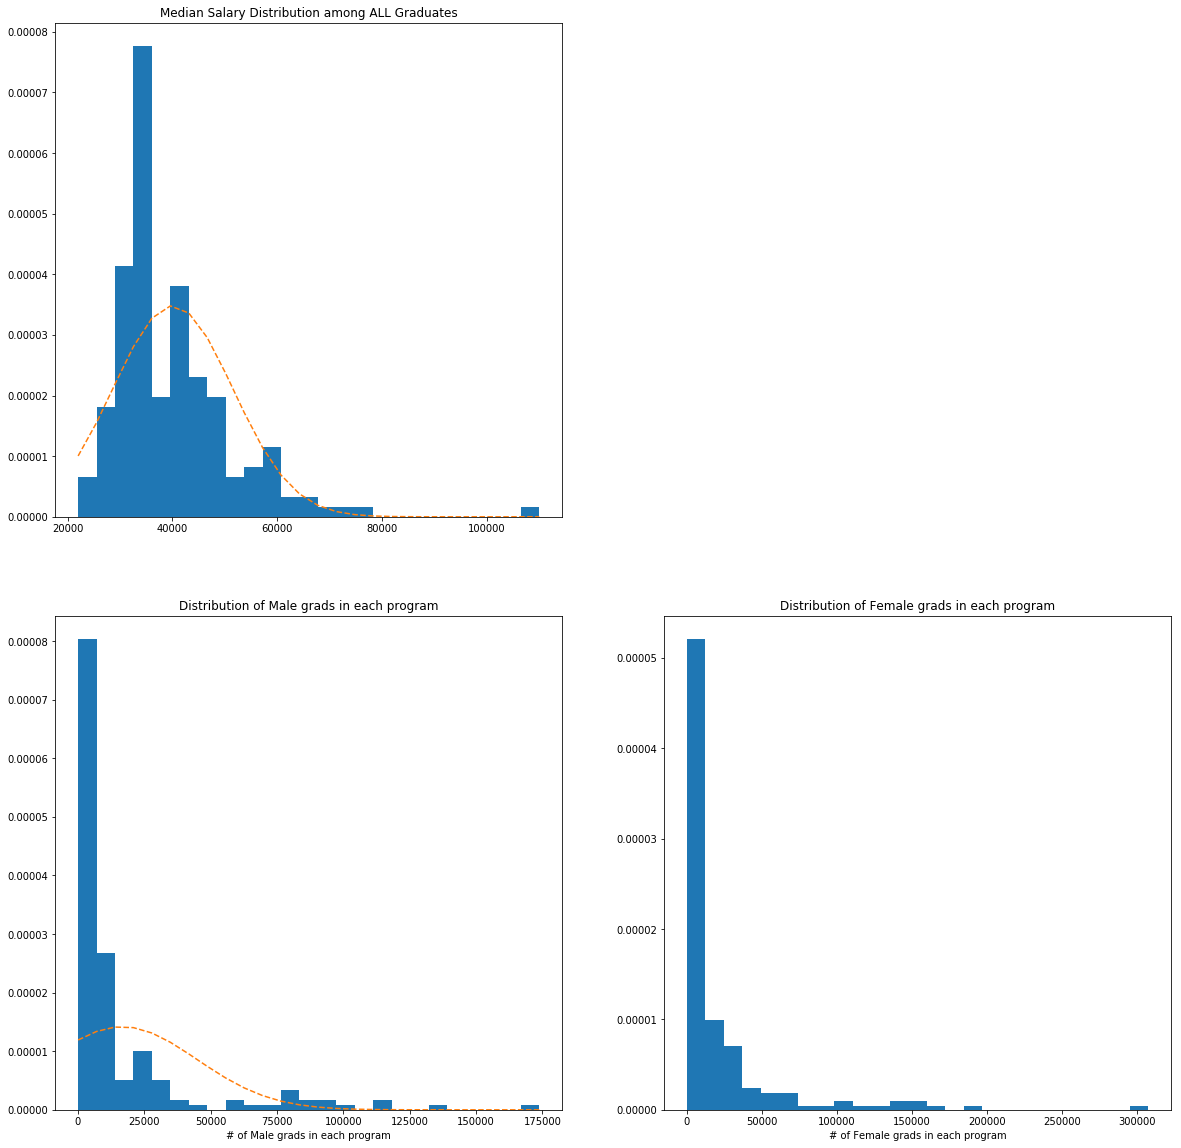

In [13]:
#Median Salary Histogram
mu1 = round(recent_grads['Median'].mean()) #Mean of distribution
sigma1 = round(recent_grads['Median'].std()) #Standard deviation of distribution

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(2,2,1)
n1, bins1, patches1 = ax1.hist(recent_grads['Median'], bins=25, density=True)
y1 = ((1 / (np.sqrt(2 * np.pi) * sigma1)) *
     np.exp(-0.5 * (1 / sigma1 * (bins1 - mu1))**2))

ax1.plot(bins1, y1, '--')
ax1.set_title('Median Salary Distribution among ALL Graduates')

#Distribution of Male Graduates
mu3 = round(recent_grads['Men'].mean()) #Mean of Male Graduates
sigma3 = round(recent_grads['Men'].std()) #Standard deviation of Male Graduates

ax3 = fig.add_subplot(2,2,3)
n3, bins3, patches3 = ax3.hist(recent_grads['Men'], bins=25, density=True)
y3 = ((1 / (np.sqrt(2 * np.pi) * sigma3)) *
     np.exp(-0.5 * (1 / sigma3 * (bins3 - mu3))**2))

ax3.plot(bins3, y3, '--')
ax3.set_title('Distribution of Male grads in each program')
ax3.set_xlabel('# of Male grads in each program')

#Distribution of Female Graduates
mu4 = round(recent_grads['Women'].mean()) #Mean of Female Graduates
sigma4 = round(recent_grads['Women'].std()) #Standard deviation of Female Graduates

ax4 = fig.add_subplot(2,2,4)
ax4.hist(recent_grads['Women'], bins=25, density=True)

ax4.set_title('Distribution of Female grads in each program')
ax4.set_xlabel('# of Female grads in each program')

**Histogram Observation:** Again with our histograms, we visualized the graduating distribution rates of each gender and found that the smallest programs easily graduated the MOST amount of students, regardless of gender.

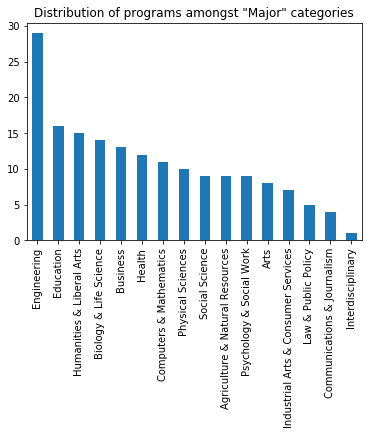

In [14]:
recent_grads['Major_category'].value_counts().plot(kind='bar', title='Distribution of programs amongst "Major" categories')

Major_category
Agriculture & Natural Resources          75620.0
Arts                                    357130.0
Biology & Life Science                  453862.0
Business                               1302376.0
Communications & Journalism             392601.0
Computers & Mathematics                 299008.0
Education                               559129.0
Engineering                             537583.0
Health                                  463230.0
Humanities & Liberal Arts               713468.0
Industrial Arts & Consumer Services     229792.0
Interdisciplinary                        12296.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Name: Total, dtype: float64 



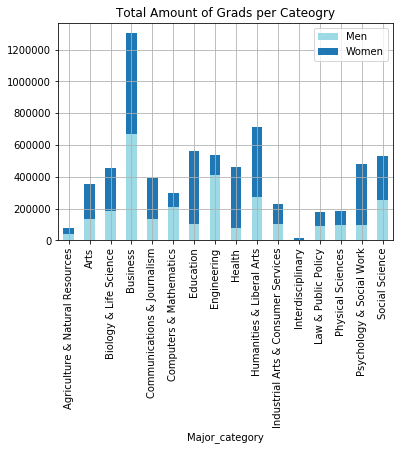

In [9]:
grouped = recent_grads.groupby(by='Major_category', axis=0)
total = grouped['Total'].sum()
print(total, '\n')

mw.plot(kind='bar', title='Total Amount of Grads per Cateogry', grid=True, stacked=True, colormap='tab20_r')

                                          Men     Women
Major_category                                         
Agriculture & Natural Resources       40357.0   35263.0
Arts                                 134390.0  222740.0
Biology & Life Science               184919.0  268943.0
Business                             667852.0  634524.0
Communications & Journalism          131921.0  260680.0
Computers & Mathematics              208725.0   90283.0
Education                            103526.0  455603.0
Engineering                          408307.0  129276.0
Health                                75517.0  387713.0
Humanities & Liberal Arts            272846.0  440622.0
Industrial Arts & Consumer Services  103781.0  126011.0
Interdisciplinary                      2817.0    9479.0
Law & Public Policy                   91129.0   87978.0
Physical Sciences                     95390.0   90089.0
Psychology & Social Work              98115.0  382892.0
Social Science                       256834.0  2

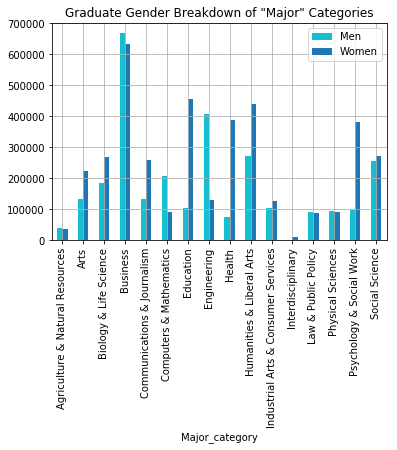

In [8]:
grouped = recent_grads.groupby(by='Major_category', axis=0)
mw = grouped[['Men', 'Women']].sum()
print(mw, '\n')

mw.plot(kind='bar', title='Graduate Gender Breakdown of "Major" Categories', grid=True, colormap='tab10_r')

Total gender variance in Engineering grads: 279031.0
Total gender variance in Computers & Mathematics grads: 118442.0


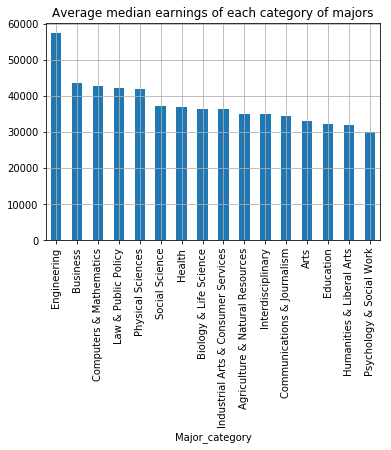

In [36]:
median = grouped['Median'].mean().sort_values(ascending=False)
print("Total gender variance in Engineering grads:", 408307.0-129276.0)
print("Total gender variance in Computers & Mathematics grads:", 208725.0-90283.0)

category_earnings = median.plot(kind='bar', title='Average median earnings of each category of majors', grid=True)

**Bar Chart Observations:** Returning to our original question "Using histograms, how many majors are predominantly male/female?" we decided to sort each major using it's pre-existing `Major_category` variable to answer this question. This step was necessary because trying to answer this question using each individual `Major` would not have been feasible, or aesthetic, to visualize. 

Once we grouped each program by it's category and then totaled the amount of male and female graduates, we were able to identify the most popular categories of degree programs by gender. Referring to the bar chart just above us, it seems that `Psychology & Social Work`, `Health`, and `Education` showed the largest variance between female-to-male graduates, with each category graduating more than double the amount of females as compared to their male counterparts. Both our side-by-side bar chart, as well as our stacked bar chart, allow us to make this comparison amongst both genders. Alternatively, male graduates outpaced female graduates in the `Engineering` and `Computers & Mathematics` categories.

Of all these variances between gender and major, programs that fell in `Engineering` category were the most significant because its median salary just under **50%** higher than the next highest category of majors which is business. As detailed in our bar graph below on median earnings & majors, engineering appears to be the real moneymaker when it comes to the ROI in education. Additionally, `Computers & Mathematics` programs represent the third highest average median earning and also the second category where male graduates clearly outpace females. It is apalling that there are **279,031** more male engineering graduates than female ones, and **118,442** more Computers/Mathematics male grads than females, signalling that we as a society need to do more push women into these profitable directions and lower this gender gap on earnings.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016FDBC64B70>,
      dtype=object)

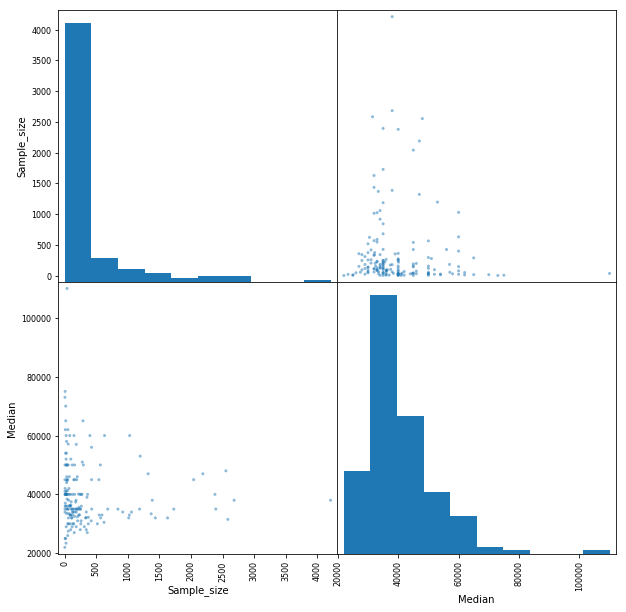

In [10]:
import pandas.plotting

pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016FDBDD5D68>,
      dtype=object)

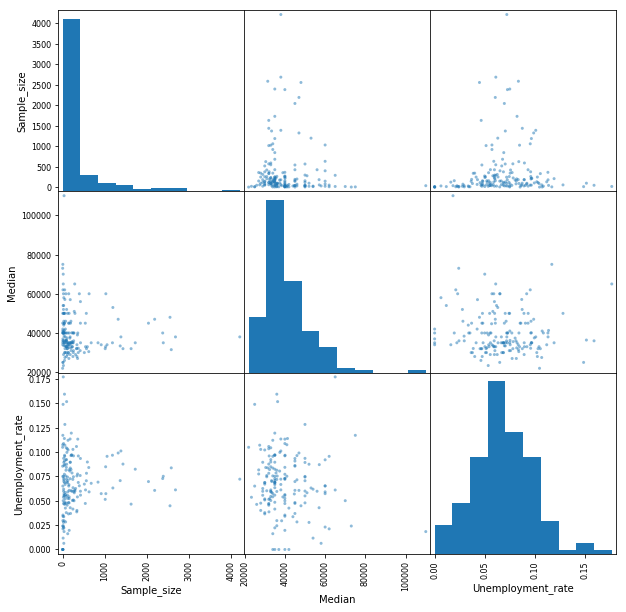

In [11]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

<Figure size 1440x1440 with 0 Axes>

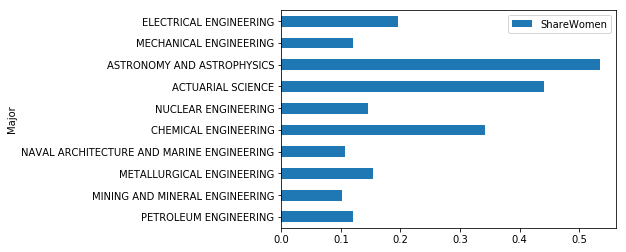

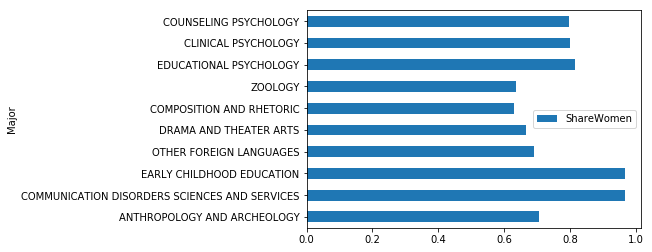

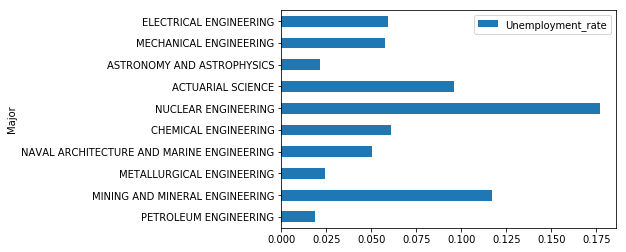

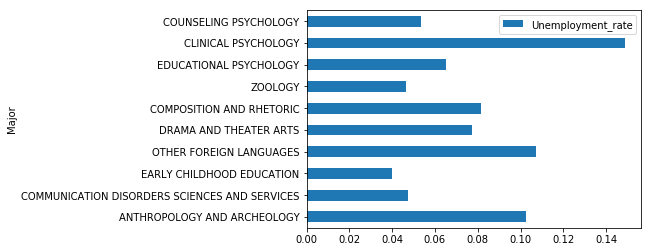

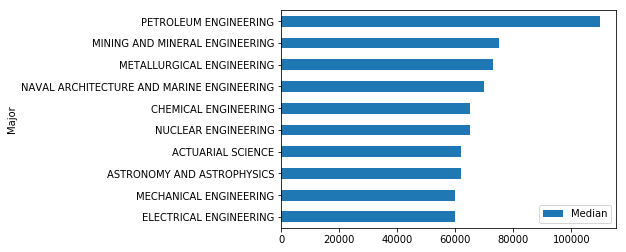

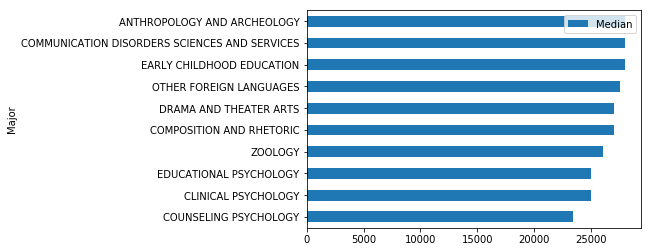

In [42]:
fig = plt.figure(figsize=[20,20])

ax1 = recent_grads[:10].plot.barh(x='Major', y='ShareWomen')
ax2 = recent_grads[-11:-1].plot.barh(x='Major', y='ShareWomen')
ax3 = recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate')
ax4 = recent_grads[-11:-1].plot.barh(x='Major', y='Unemployment_rate')
ax5 = recent_grads[:10].sort_index(ascending=False).plot.barh(x='Major', y='Median')
ax6 = recent_grads[-11:-1].sort_index(ascending=False).plot.barh(x='Major', y='Median')

plt.show()